### Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Load Feature-Engineered Dataset

In [ ]:
df = pd.read_csv("electricity_demand_features.csv")
df.head()

,day,hour,time_normalized,sin_time,cos_time,temp,is_weekend,measured_demand
0,0,0.0,0.000000,0.000000,1.000000,25.745071,0,2.904928
1,0,0.5,0.020833,0.130526,0.991445,25.836813,0,3.321722
2,0,1.0,0.041667,0.258819,0.965926,28.042085,0,3.488050
3,0,1.5,0.062500,0.382683,0.923880,30.346012,0,3.534498
4,0,2.0,0.083333,0.500000,0.866025,28.648770,0,4.059016


### Define Features and Target

In [ ]:
X = df[
    ["time_normalized", "sin_time", "cos_time", "temp", "is_weekend"]
].values

y = df["measured_demand"].values

### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42
)

### Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Baseline MLP Model

In [ ]:
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    alpha=0.001,
    learning_rate_init=0.001,
    max_iter=2000,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(64, 32), max_iter=2000,
             random_state=42)

### Model Evaluation

In [ ]:
y_pred_mlp = mlp.predict(X_test_scaled)

mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

mse_mlp, r2_mlp

(0.046506110227241514, 0.9596002310732801)

### Actual vs Predicted Visualization

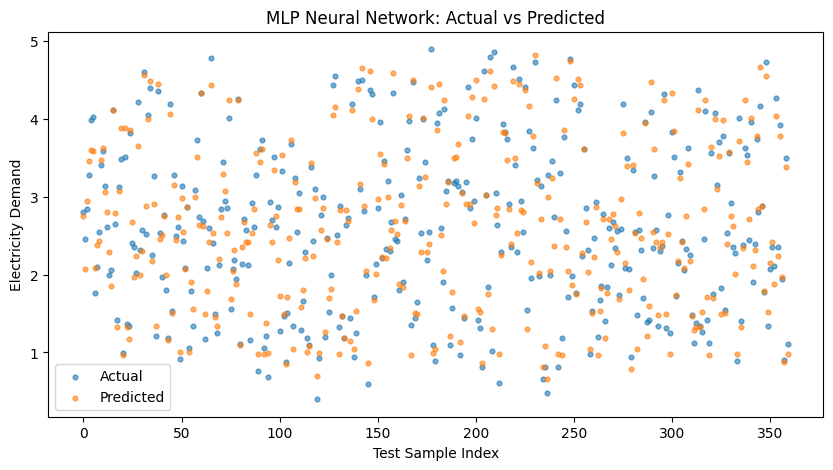

In [ ]:
plt.figure(figsize=(10, 5))

plt.scatter(
    range(len(y_test)),
    y_test,
    s=12,
    alpha=0.6,
    label="Actual"
)

plt.scatter(
    range(len(y_pred_mlp)),
    y_pred_mlp,
    s=12,
    alpha=0.6,
    label="Predicted"
)

plt.xlabel("Test Sample Index")
plt.ylabel("Electricity Demand")
plt.title("MLP Neural Network: Actual vs Predicted")
plt.legend()
plt.show()

### Error Distribution

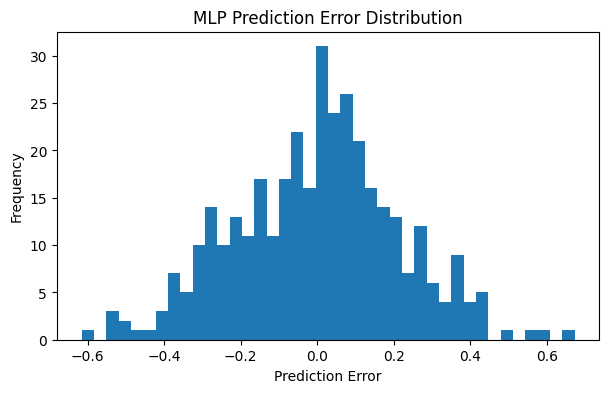

In [ ]:
errors = y_test - y_pred_mlp

plt.figure(figsize=(7, 4))
plt.hist(errors, bins=40)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("MLP Prediction Error Distribution")
plt.show()

### Training Loss Curve

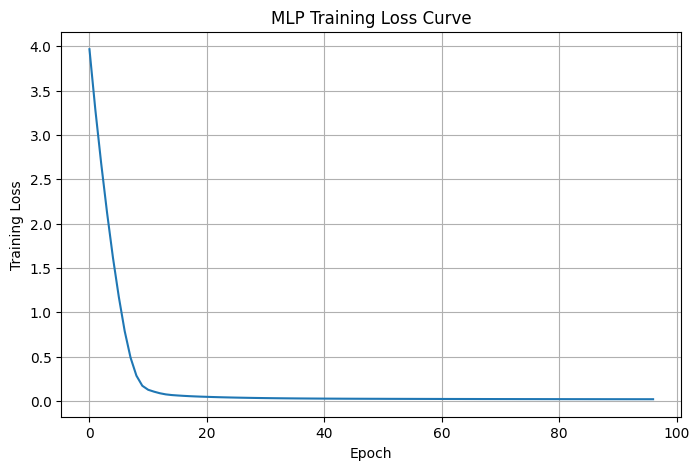

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("MLP Training Loss Curve")
plt.grid(True)
plt.show()

### Effect of Network Size

In [ ]:
architectures = [(16,), (32,), (64,), (64, 32), (128, 64)]
mse_list = []

for arch in architectures:
    model = MLPRegressor(
        hidden_layer_sizes=arch,
        max_iter=1500,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse_list.append(mean_squared_error(y_test, y_pred))

### Plot Architecture vs Error

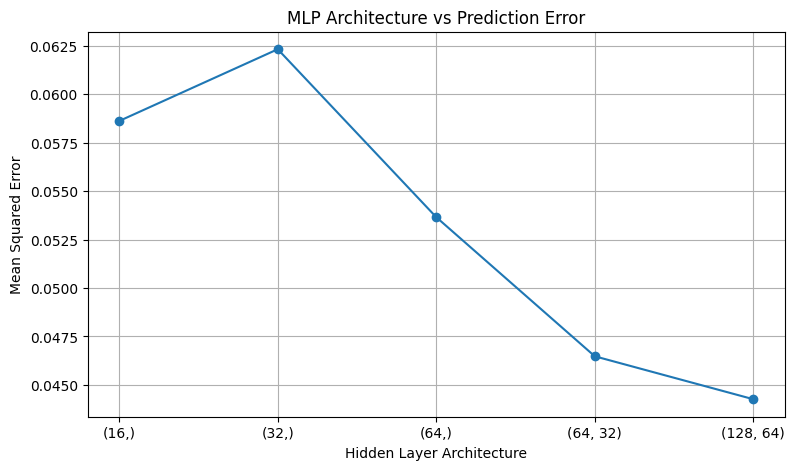

In [ ]:
labels = [str(a) for a in architectures]

plt.figure(figsize=(9, 5))
plt.plot(labels, mse_list, marker="o")

plt.xlabel("Hidden Layer Architecture")
plt.ylabel("Mean Squared Error")
plt.title("MLP Architecture vs Prediction Error")
plt.grid(True)
plt.show()

### Model Comparison Summary

In [ ]:
print("Model Performance Summary")
print("-" * 40)
print(f"MLP MSE : {mse_mlp:.4f}")
print(f"MLP R²  : {r2_mlp:.4f}")

print("\nObservation:")
print("MLP captures non-linear demand patterns effectively.")

Model Performance Summary
----------------------------------------
MLP MSE : 0.0465
MLP R²  : 0.9596

Observation:
MLP captures non-linear demand patterns effectively.


### Summary

- MLP learns complex non-linear relationships
- Performs competitively with SVR and GPR
- Requires careful scaling and tuning
- May overfit if network is too large